In [2]:
#API Calls - Dallas

import requests
import pandas as pd

# %pip install openpyxl

# Load the FIPS codes into a set for efficiency
fips_codes_df = pd.read_excel('./data_files/Dallas_Tract_ID.xlsx', header=None, engine='openpyxl')
fips_codes = set(fips_codes_df[0].astype(str).str.pad(width=11, side='left', fillchar='0'))

# DataFrame to store all results
dallas_data = pd.DataFrame()
print(fips_codes)
# Initialize counters for tracking API calls
success_count = 0
fail_count = 0


# Loop through the FIPS codes, limited by 100 rows. max 178
for i, fips_code in enumerate(fips_codes):
    if i >= 40:
        break  # Exit the loop after reaching max_calls

    # Construct the API URL for Houston data
    url = f"https://ejscreen.epa.gov/mapper/ejscreenRESTbroker1.aspx?namestr={fips_code}&geometry=&distance=&unit=9035&areatype=tract&areaid={fips_code}&f=json"
    response = requests.get(url)
    
    data = response.json()
    if 'data' in data:
        df = pd.json_normalize(data['data'])
        dallas_data = pd.concat([dallas_data, df], ignore_index=True)
        success_count += 1
    else:
        fail_count += 1

# Display the counts and the first few rows of the combined data
print(f"Success: {success_count}, Failures: {fail_count}")

{'48113008102', '48113001602', '48113013611', '48113014502', '48113019024', '48113013104', '48113014142', '48113000503', '48113004800', '48113013718', '48113007823', '48113019029', '48113008000', '48113017602', '48113014135', '48113018002', '48113004500', '48113004300', '48113014153', '48113016529', '48113020600', '48113019023', '48113018149', '48113007915', '48113016528', '48113011002', '48113020401', '48113008701', '48113000202', '48113019025', '48113007906', '48113016536', '48113001802', '48113013010', '48113007205', '48113019052', '48113020200', '48113016511', '48113009611', '48113014124', '48113006100', '48113014161', '48113015500', '48113018505', '48113018700', '48113019800', '48113010808', '48113010804', '48113008703', '48113012210', '48113010101', '48113015404', '48113012209', '48113005901', '48113007819', '48113001503', '48113019203', '48113014209', '48113016203', '48113012302', '48113017009', '48113010805', '48113011201', '48113009203', '48113007903', '48113012701', '48113014

In [4]:
#Exploring Data

dallas_data.describe()
dallas_data.shape


(40, 317)

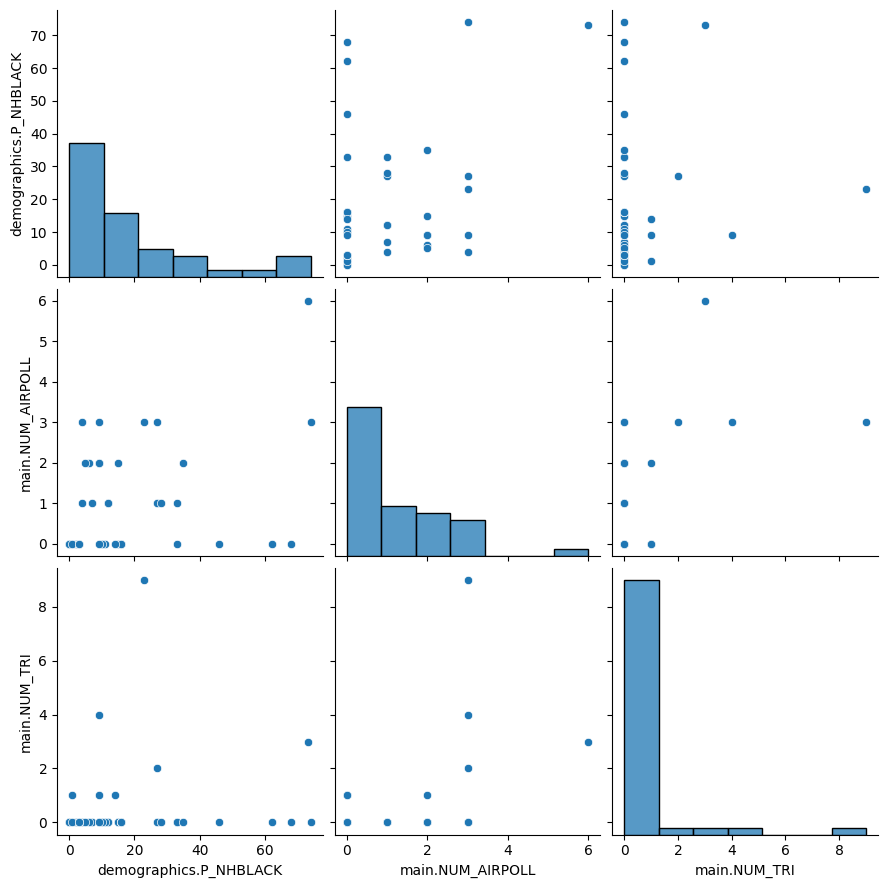

In [5]:
#Visualizing Data

#If you don't already have seaborn
# %pip install --upgrade seaborn
# %pip install --upgrade numpy

import seaborn as sns 
import pandas as pd

#Setting the theme
# sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

#Convert to numeric
dallas_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]] = dallas_data[["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"]].apply(pd.to_numeric)


sns.pairplot(dallas_data, vars =["demographics.P_NHBLACK", "main.NUM_AIRPOLL", "main.NUM_TRI"],height=3)
# sns.scatterplot(x="demographics.P_NHBLACK", y="extras.RAW_CI_FLOOD", data= dallas_data)


#Outliers problematic

In [4]:
#Pandas DF to SQL DB

#inspired by https://stackoverflow.com/questions/30631325/writing-to-mysql-database-with-pandas-using-sqlalchemy-to-sql
# %pip install sqlalchemy

import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///data_files/dallas_epa.db')

dallas_data.to_sql('dallas_epa', engine, index=False, if_exists='replace')

343

In [5]:
#Check SQL Database

from sqlalchemy import create_engine, text

# Create an engine that connects to the SQLite database file in your data_files directory
engine = create_engine('sqlite:///data_files/dallas_epa.db')

# Connect to the database
with engine.connect() as connection:
    # Execute a simple SQL query to count the rows in the dallas_epa table
    row_count = connection.execute(text("SELECT COUNT(*) FROM dallas_epa")).fetchone()[0]

print(f"The number of rows in the 'dallas_epa' table is: {row_count}")

The number of rows in the 'los_angeles_epa' table is: 343
